In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
trips_df = pd.read_pickle('../00_data/trips_with_hourly_features.pkl')
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225627 entries, 19 to 290340
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   duration     225627 non-null  float64
 1   distance     225627 non-null  float64
 2   speed        225627 non-null  float64
 3   temp         225627 non-null  float64
 4   precip       225627 non-null  float64
 5   hour_start   225627 non-null  int64  
 6   day_of_week  225627 non-null  int64  
 7   month        225627 non-null  int64  
 8   is_weekday   225627 non-null  int64  
 9   is_holiday   225627 non-null  int64  
 10  hour_end     225627 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 20.7 MB


In [4]:
trips_df.head(2)

,duration,distance,speed,temp,precip,hour_start,day_of_week,month,is_weekday,is_holiday,hour_end
19,80.0,0.000000,0.000000,15.6,0.0,1,1,1,1,1,2
20,4.0,0.156355,2.345331,15.6,0.0,1,1,1,1,1,1


In [5]:
#Testing different features here
#trips_df = trips_df[['distance', 'speed','hour_end','temp','precip','hour_start','day_of_week','month','duration_min']].copy()

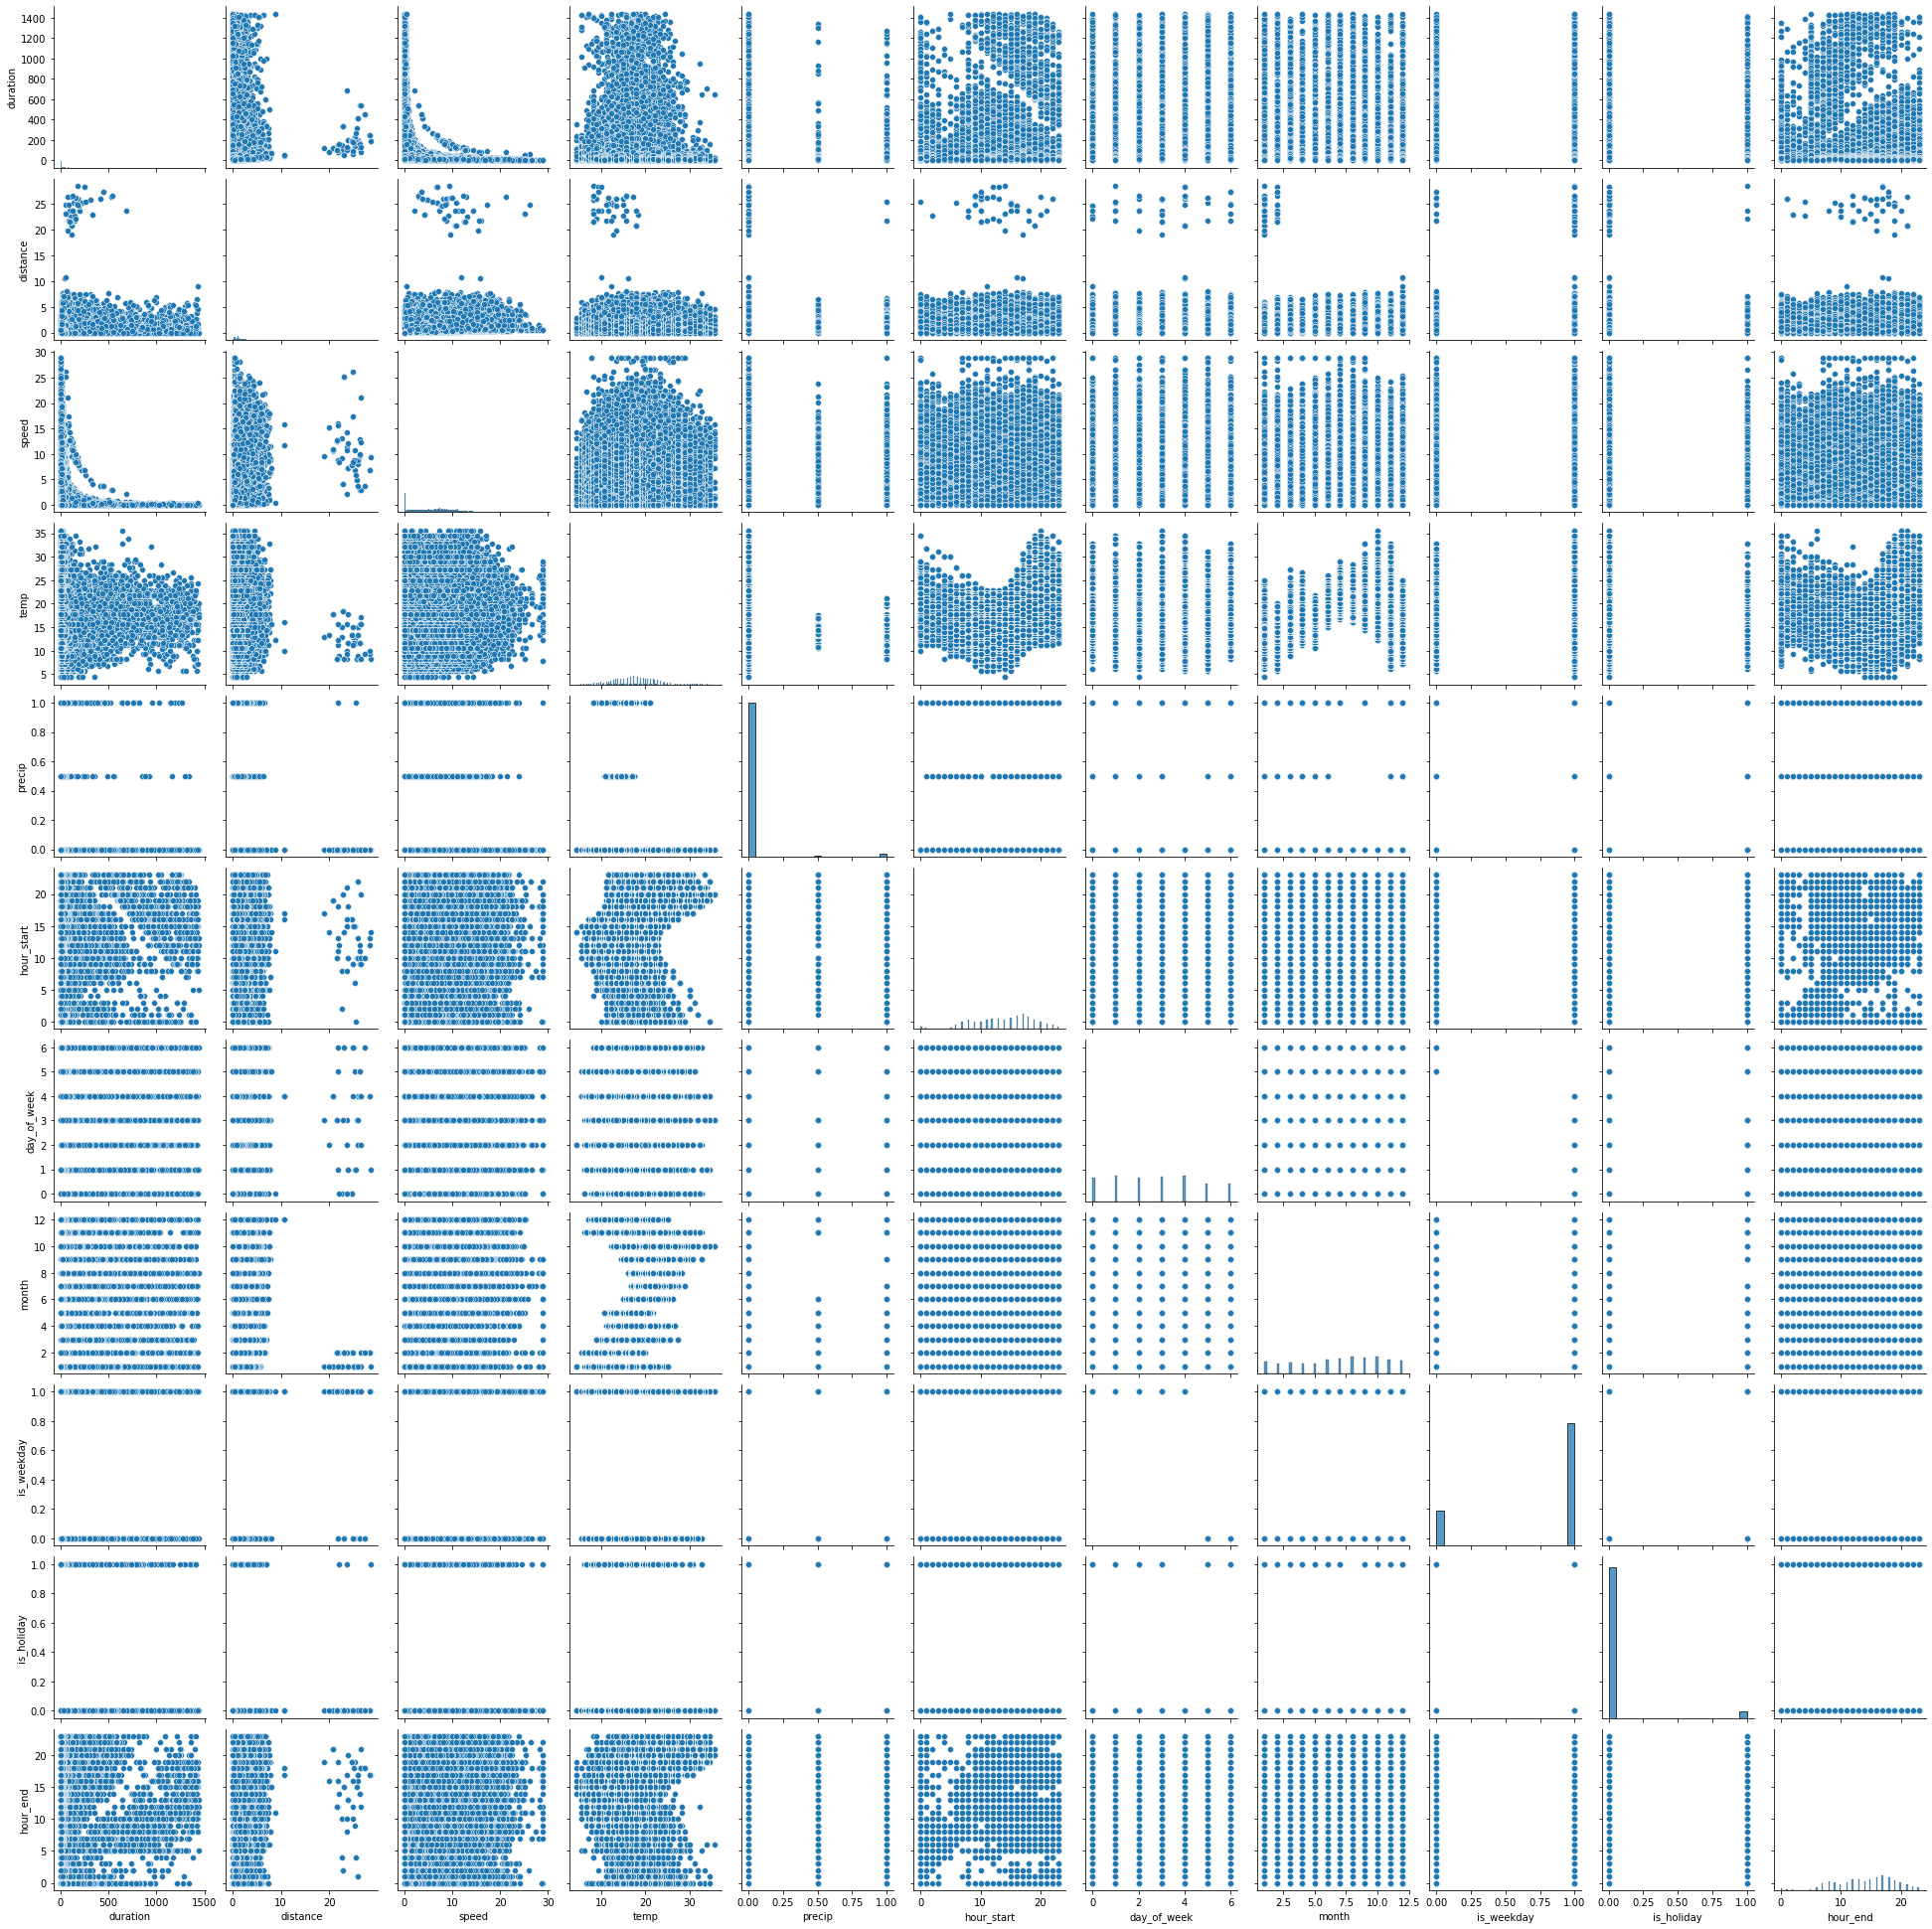

In [6]:
sns.pairplot(data=trips_df)

In [7]:
#X=trips_df TODO Feature selection -> datetime format problem
X = trips_df
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

,duration,distance,speed,temp,precip,hour_start,day_of_week,month,is_weekday,is_holiday,hour_end
19,0.795684,-1.050004,-1.426842,-0.453807,-0.148258,-2.662604,-0.934522,-1.754357,0.53487,4.778389,-2.446509
20,-0.245179,-0.893602,-0.888913,-0.453807,-0.148258,-2.662604,-0.934522,-1.754357,0.53487,4.778389,-2.648989
21,0.768293,-1.050004,-1.426842,-0.453807,-0.148258,-2.662604,-0.934522,-1.754357,0.53487,4.778389,-2.446509
22,0.206775,1.981254,-0.299740,-0.453807,-0.148258,-2.662604,-0.934522,-1.754357,0.53487,4.778389,-2.446509
23,0.193079,1.981254,-0.268432,-0.453807,-0.148258,-2.662604,-0.934522,-1.754357,0.53487,4.778389,-2.446509


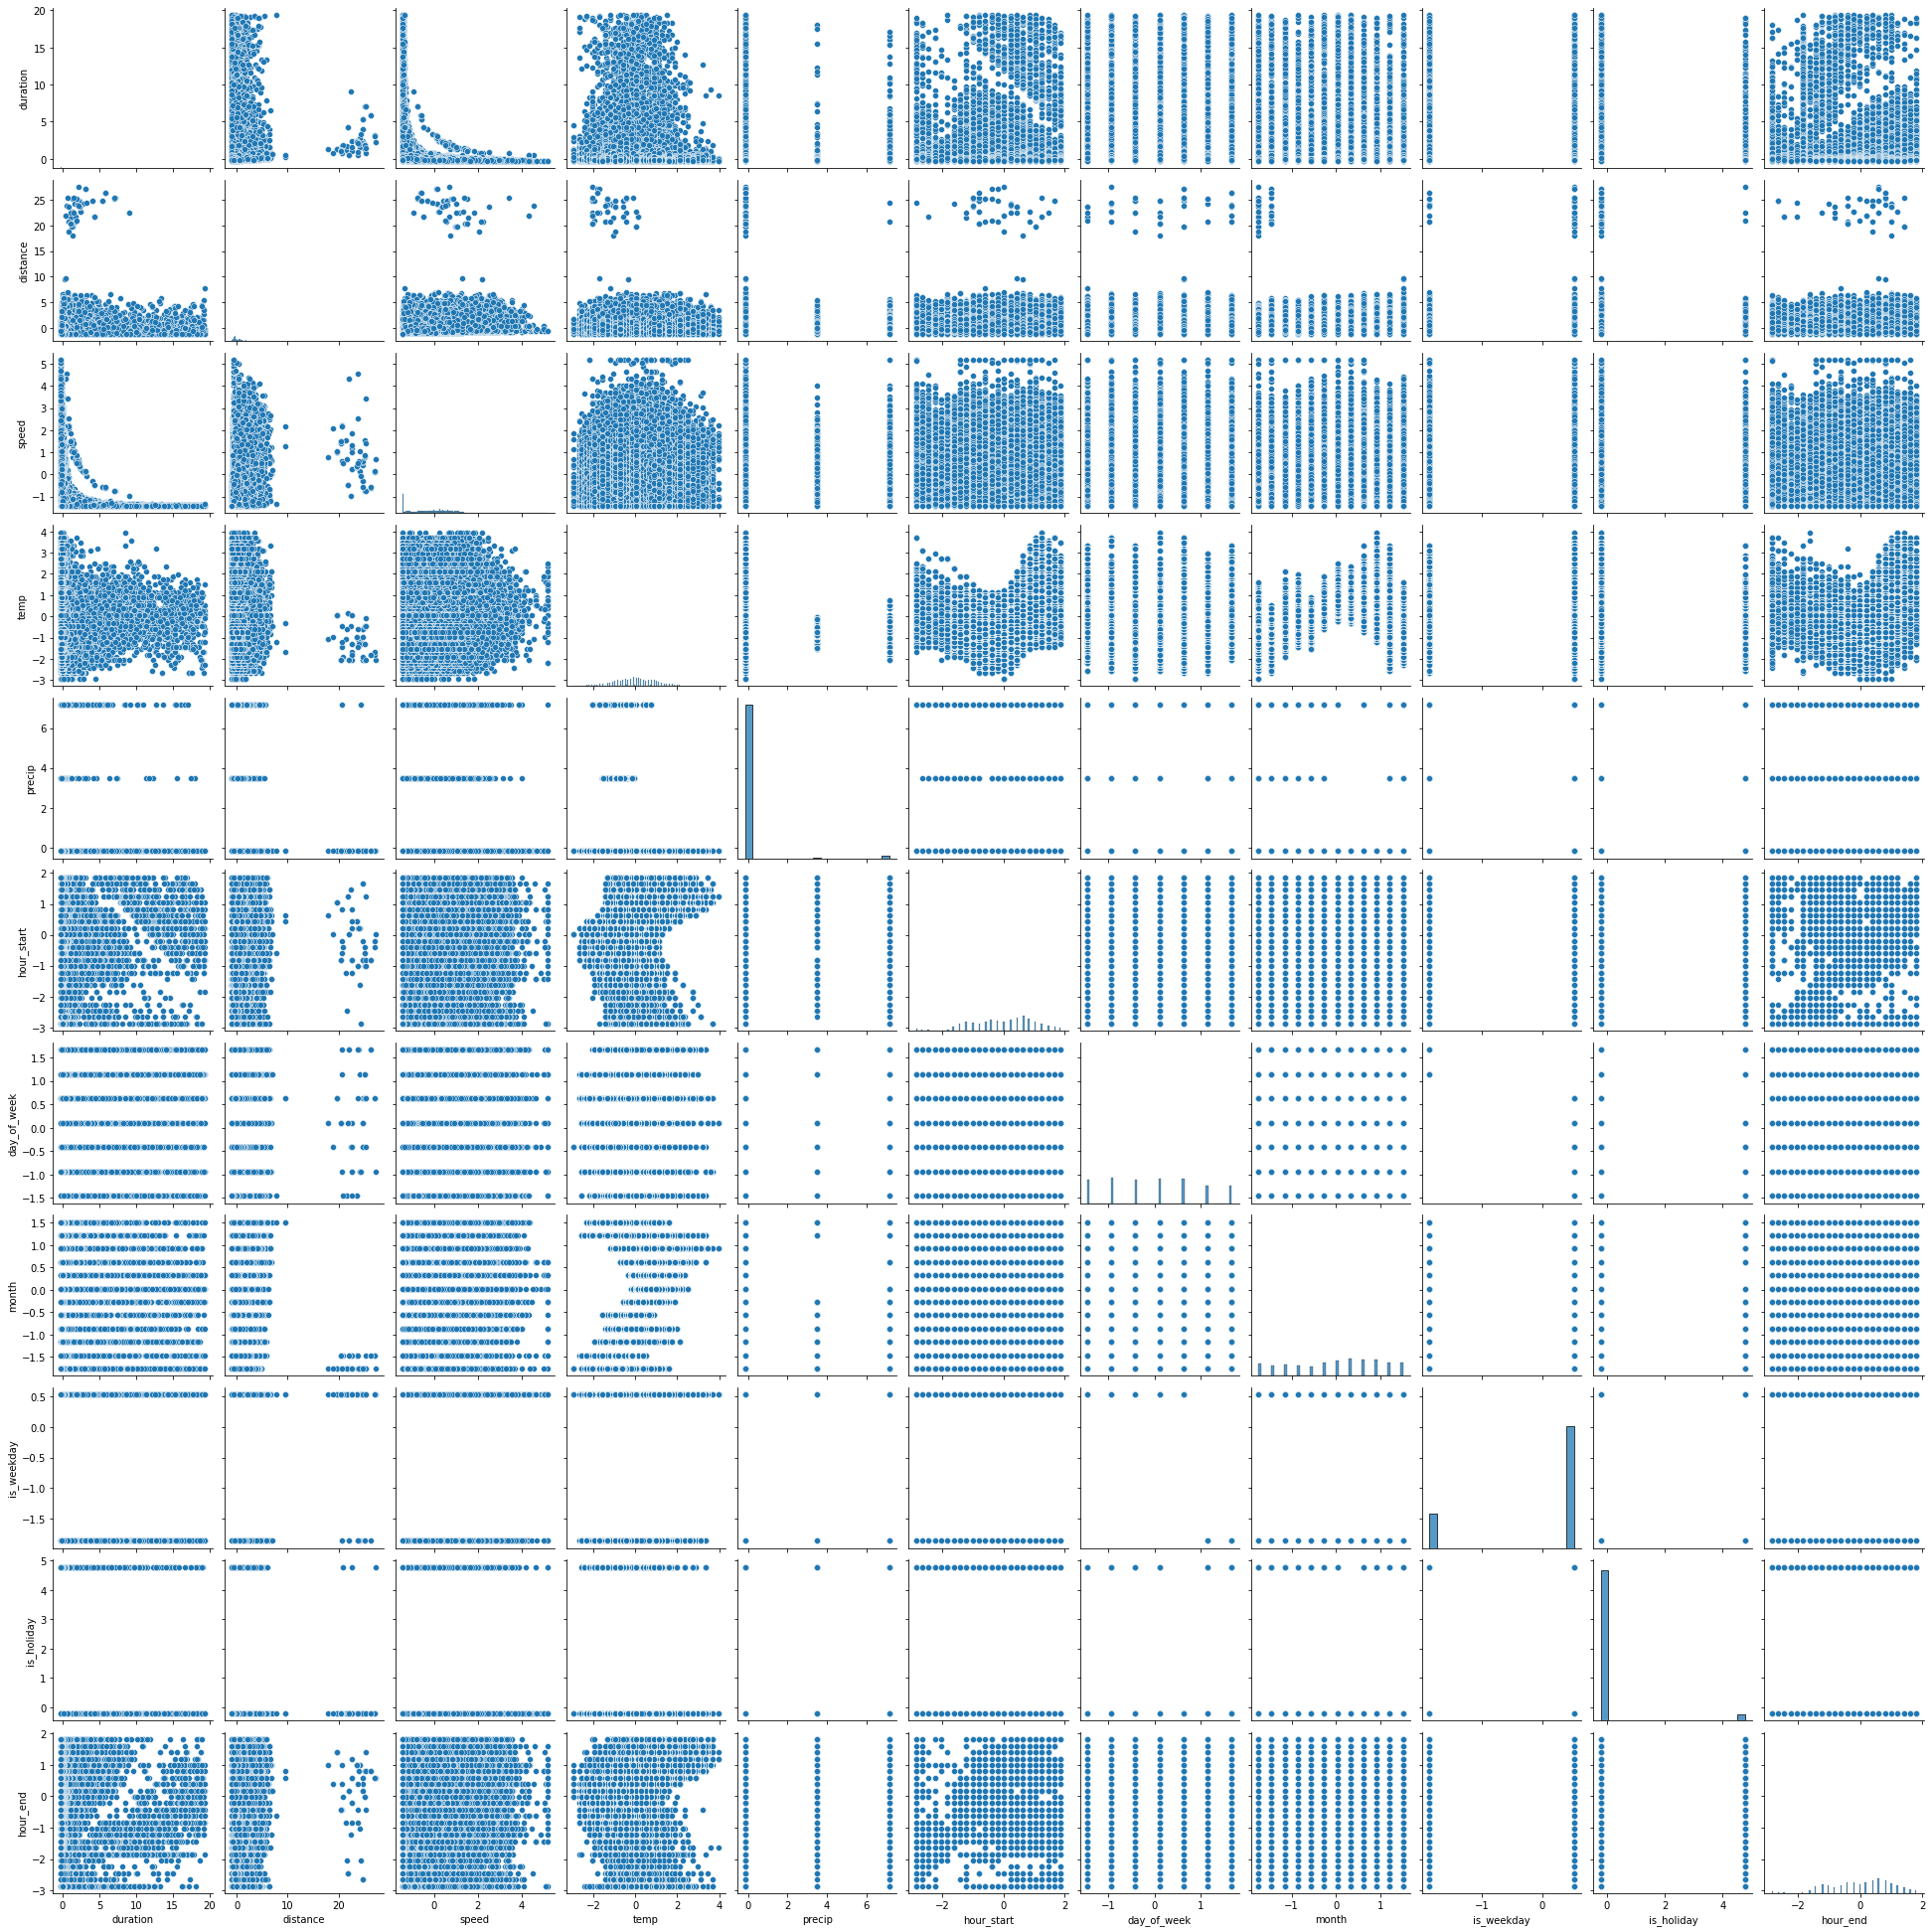

In [8]:
sns.pairplot(data=X_scaled_df)
#x.head()

# k-means


In [9]:
k_max = 20

In [10]:
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1, )
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

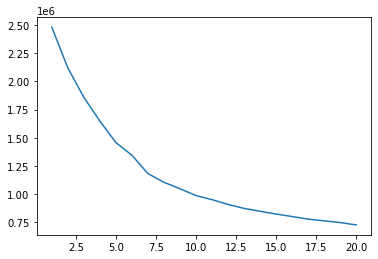

In [11]:
plt.plot(clusters, losses)
plt.show()


(0.0, 10.0)

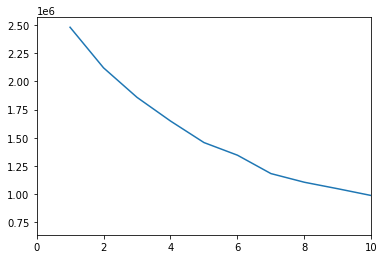

In [12]:
plt.plot(clusters, losses)
plt.xlim([0,10])


In [13]:
best_means = KMeans(n_clusters=7)
best_means.fit(X_scaled)
best_means.predict(X_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [14]:
len(best_means.cluster_centers_)

7

In [15]:
clusters = best_means.cluster_centers_
clusters = scaler.inverse_transform(clusters)
clusters_df = pd.DataFrame(clusters, columns=X.columns)
clusters_rounded_df = clusters_df.round(2)
clusters_rounded_df["size"] = X_scaled_df.groupby(best_means.labels_).size()

clusters_rounded_df["labels"] = [
    "weekend",
    "fast|early|wednesday",
    "hot",
    "long",
    "rainy",
    "cold|sunny",
    "holiday",
]

clusters_rounded_df


,duration,distance,speed,temp,precip,hour_start,day_of_week,month,is_weekday,is_holiday,hour_end,size,labels
0,25.19,1.02,5.77,17.26,0.00,14.27,1.92,7.18,0.82,1.00,14.46,9028,weekend
1,30.43,0.51,2.89,19.76,0.00,16.80,2.05,8.16,1.00,-0.00,16.89,46355,fast|early|wednesday
2,11.75,1.13,7.95,17.59,0.00,7.91,2.18,8.30,0.95,-0.00,8.03,47835,hot
3,31.91,1.03,4.85,17.86,0.00,15.01,5.50,7.00,0.00,-0.00,15.20,44971,long
4,21.25,0.92,5.92,12.72,0.00,12.96,2.26,2.58,1.00,-0.00,13.15,35273,rainy
5,21.71,0.95,5.88,13.89,0.93,14.78,2.39,4.83,0.83,0.09,15.00,4749,cold|sunny
6,12.12,1.78,10.23,20.10,0.00,17.55,2.03,7.73,0.99,0.00,17.70,37416,holiday


In [16]:
X_scaled_df["y"] = best_means.predict(X_scaled)
#sns.pairplot(data=X_scaled_df, hue="y")

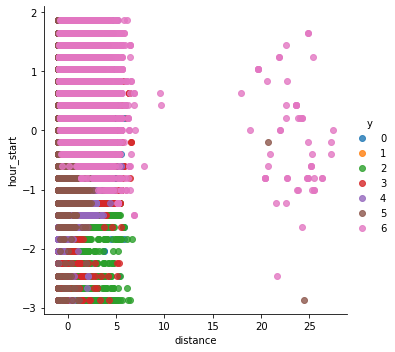

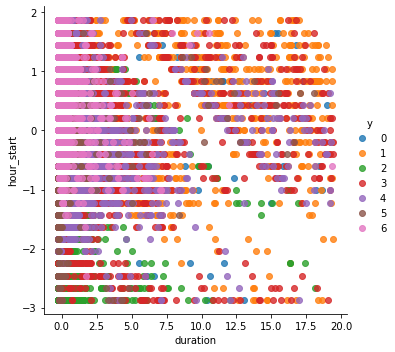

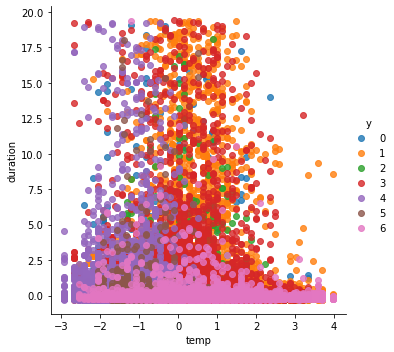

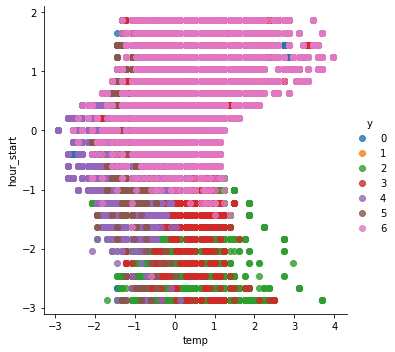

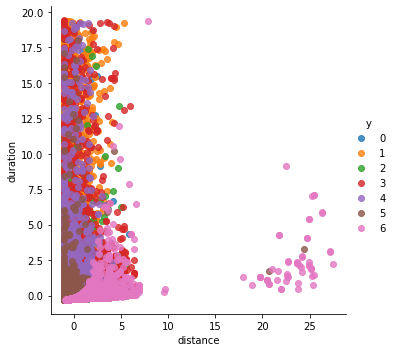

In [17]:
sns.lmplot(x="distance", y="hour_start", data=X_scaled_df, fit_reg=False, hue="y")
sns.lmplot(x="duration", y="hour_start", data=X_scaled_df, fit_reg=False, hue="y")
sns.lmplot(x="temp", y="duration", data=X_scaled_df, fit_reg=False, hue="y")
sns.lmplot(x="temp", y="hour_start", data=X_scaled_df, fit_reg=False, hue="y")
sns.lmplot(x="distance", y="duration", data=X_scaled_df, fit_reg=False, hue="y")


# with Principal Component Analysis (PCA)


In [18]:
# Scale features

scaler = StandardScaler()
trips_scaled = pd.DataFrame(scaler.fit_transform(trips_df))

In [19]:
trips_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.795684,-1.050004,-1.426842,-0.453807,-0.148258,-2.662604,-0.934522,-1.754357,0.53487,4.778389,-2.446509
1,-0.245179,-0.893602,-0.888913,-0.453807,-0.148258,-2.662604,-0.934522,-1.754357,0.53487,4.778389,-2.648989
2,0.768293,-1.050004,-1.426842,-0.453807,-0.148258,-2.662604,-0.934522,-1.754357,0.53487,4.778389,-2.446509
3,0.206775,1.981254,-0.299740,-0.453807,-0.148258,-2.662604,-0.934522,-1.754357,0.53487,4.778389,-2.446509
4,0.193079,1.981254,-0.268432,-0.453807,-0.148258,-2.662604,-0.934522,-1.754357,0.53487,4.778389,-2.446509


In [20]:
# Run PCA to reduce dimensionality
pca = PCA(n_components=4)
trips_scaled_pca = pca.fit_transform(trips_scaled)

In [21]:
sum(pca.explained_variance_ratio_)

0.6129716470828661

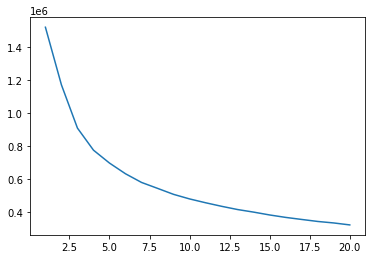

In [22]:
clusters = []
losses = []

for i in range(k_max):
    model = KMeans(n_clusters=i+1)
    model.fit(trips_scaled_pca)
    clusters.append(i+1)
    losses.append(model.inertia_)

plt.plot(clusters, losses)
plt.show()

(0.0, 10.0)

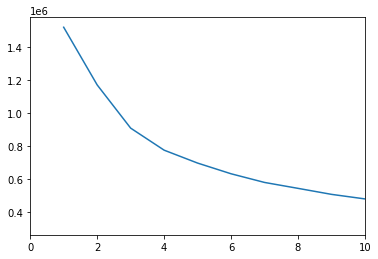

In [23]:
plt.plot(clusters, losses)
plt.xlim([0,10])

In [24]:
best_kmeans = KMeans(n_clusters=4)
best_kmeans.fit(trips_scaled_pca)

KMeans(n_clusters=4)

In [25]:
best_kmeans.predict(trips_scaled_pca)

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [26]:
trips_scaled_pca_df = pd.DataFrame(trips_scaled_pca, index=trips_df.index)
trips_scaled_pca_df.columns = ["PC"+str(column+1) for column in trips_scaled_pca_df.columns]

In [27]:
trips_scaled_pca_df["y"] = best_kmeans.predict(trips_scaled_pca)

trips_scaled_pca_df.head()

,PC1,PC2,PC3,PC4,y
19,3.354798,0.930508,-2.702986,-0.875422,3
20,3.636953,0.611940,-2.146833,-0.613034,3
21,3.355899,0.925625,-2.698408,-0.873488,3
22,3.853106,0.063284,-0.423807,0.742709,3
23,3.859796,0.051860,-0.405084,0.753694,3


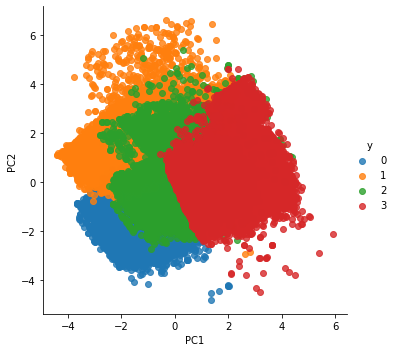

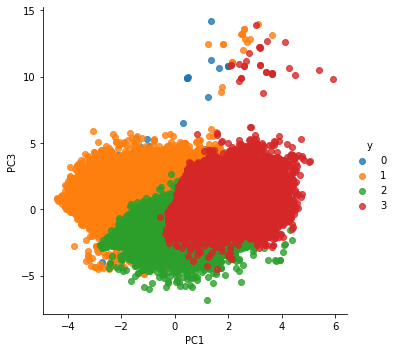

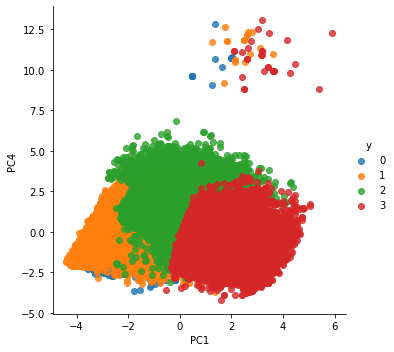

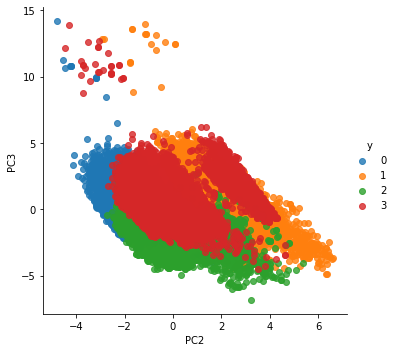

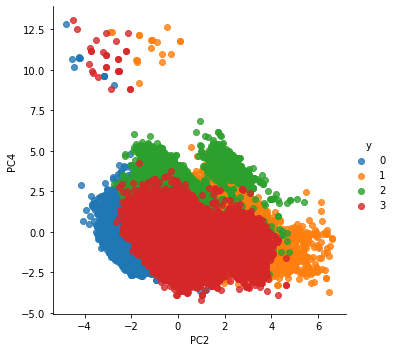

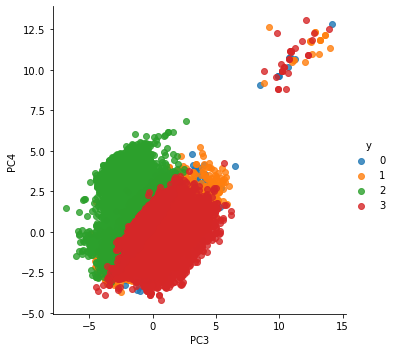

In [28]:
sns.lmplot(x="PC1", y="PC2", data=trips_scaled_pca_df, fit_reg=False, hue="y")
sns.lmplot(x="PC1", y="PC3", data=trips_scaled_pca_df, fit_reg=False, hue="y")
sns.lmplot(x="PC1", y="PC4", data=trips_scaled_pca_df, fit_reg=False, hue="y")
sns.lmplot(x="PC2", y="PC3", data=trips_scaled_pca_df, fit_reg=False, hue="y")
sns.lmplot(x="PC2", y="PC4", data=trips_scaled_pca_df, fit_reg=False, hue="y")
sns.lmplot(x="PC3", y="PC4", data=trips_scaled_pca_df, fit_reg=False, hue="y")

# Hierarchical Clustering

In [29]:
# Todo